In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.text import Text
import seaborn as sns
pd_data = pd.read_csv('/content/customer_shopping_data.csv')
pd_data

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [ ]:
# Show general information about the data
print(pd_data.info())

# Display statistical descriptions for numeric columns
print(pd_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None
                age      quantity         price
count  99457.000000  99457.000000  99457.000000
mean      43.427089      3.003429    689.256321
std       14.990054      1.413025    941.184567
min       18.000000      1.000000      5.230000
25%       30.000000      2.000000     45.450

In [ ]:
# update currency value, add comma to thousands, add $, add new dataframe csv
if "price" in pd_data.columns:
    pd_data["Formatted Price"] = pd_data["price"].apply(lambda x: f"${x:,.2f}")
else:
    print("Column 'Price' not found in the DataFrame.")

print(pd_data[["price", "Formatted Price"]].head())

pd_data.to_csv("Customer Shopping Data Formatted.csv", index=False)

print("Saved into Customer Shopping Data Formatted.csv successed!")

print(pd_data)

     price Formatted Price
0  1500.40       $1,500.40
1  1800.51       $1,800.51
2   300.08         $300.08
3  3000.85       $3,000.85
4    60.60          $60.60
Saved into Customer Shopping Data Formatted.csv successed!
      invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & 

In [ ]:
pd_data['invoice_date'] = pd.to_datetime(pd_data['invoice_date'], format='%d/%m/%Y')

pd_data['invoice_date'] = pd_data['invoice_date'].fillna(pd.to_datetime(pd_data['invoice_date'], format = '%d-%m-%Y', errors = 'coerce'))

pd_data.to_csv('/content/Customer Shopping Data Formatted.csv', index=False)

print("Saved success into Customer Shopping Data Formatted.csv")

print(pd_data)

Saved success into Customer Shopping Data Formatted.csv
      invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Sou

In [ ]:
pd_data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Formatted Price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,"$1,500.40"
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,"$1,800.51"
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,$300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,"$3,000.85"
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,$60.60


In [ ]:
import plotly.express as px
import pandas as pd

data = {
    'name': [
        'Cevahir AVM', 'Emaar Square Mall', 'Forum Istanbul',
        'Istinye Park', 'Kanyon', 'Mall of Istanbul',
        'Metrocity', 'Metropol AVM', 'Viaport Outlet', 'Zorlu Center'
    ],
    'lat': [
        41.0584, 41.0366, 40.9935,
        41.0863, 41.0692, 41.0257,
        41.0830, 41.0260, 40.8724, 41.0534
    ],
    'lon': [
        28.9997, 28.9747, 28.8500,
        29.0212, 29.0193, 28.8900,
        28.9588, 28.9917, 29.2824, 28.9998
    ],
    'color': [
        'red', 'blue', 'green',
        'orange', 'purple', 'pink',
        'cyan', 'magenta', 'yellow', 'brown'
    ],
    'price_usd': [100, 105, 110, 115, 250, 300, 200, 130, 135, 140]  # Thêm một cột để tùy chỉnh kích thước
}
df = pd.DataFrame(data)

fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='lon',
    text='name',
    size='price_usd',
    color='color',
    center={"lat": 41.0, "lon": 28.9},
    width=1400,
    height=900,
    hover_name='name',
    size_max=20
)

fig.update_layout(mapbox_style="open-street-map")

for i, name in enumerate(df['name']):
    fig.data[i].name = name

fig.show()

In [ ]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   invoice_no       99457 non-null  object        
 1   customer_id      99457 non-null  object        
 2   gender           99457 non-null  object        
 3   age              99457 non-null  int64         
 4   category         99457 non-null  object        
 5   quantity         99457 non-null  int64         
 6   price            99457 non-null  float64       
 7   payment_method   99457 non-null  object        
 8   invoice_date     99457 non-null  datetime64[ns]
 9   shopping_mall    99457 non-null  object        
 10  Formatted Price  99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 8.3+ MB


In [ ]:
pd_data.head(100)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,Formatted Price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,"$1,500.40"
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,"$1,800.51"
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,$300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,"$3,000.85"
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,$60.60
...,...,...,...,...,...,...,...,...,...,...,...
95,I172458,C277842,Female,19,Clothing,2,600.16,Debit Card,2021-12-17,Cevahir AVM,$600.16
96,I297270,C183011,Male,62,Clothing,5,1500.40,Credit Card,2022-12-31,Metropol AVM,"$1,500.40"
97,I153930,C567813,Male,39,Food & Beverage,3,15.69,Cash,2022-08-09,Forum Istanbul,$15.69
98,I282854,C282974,Female,33,Clothing,3,900.24,Cash,2022-07-31,Kanyon,$900.24


In [ ]:
# Hiển thị thông tin tổng quát về dữ liệu
print(pd_data.info())

# Hiển thị mô tả thống kê cho các cột số
print(pd_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB
None
                age      quantity         price                invoice_date
count  99457.000000  99457.000000  99457.000000                       99457
mean      43.427089      3.00

In [ ]:
import pandas as pd

data = [1, 2, 3, 4, 5]
std_dev = pd.Series(data).std()
print("Độ lệch chuẩn:", std_dev)


Độ lệch chuẩn: 1.5811388300841898


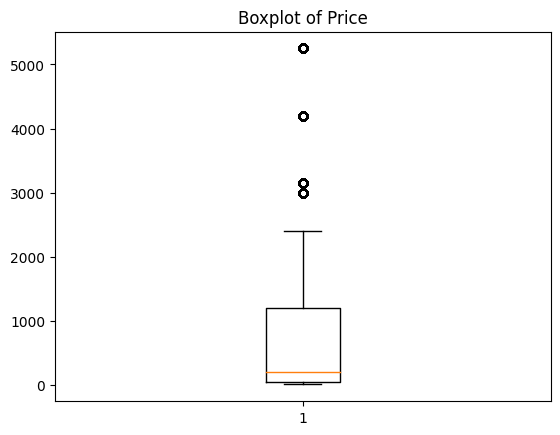

In [ ]:
plt.boxplot(pd_data['price'])
plt.title('Boxplot of Price')
Text(1, 1.5, "Boxplot Price Diff")
plt.show()

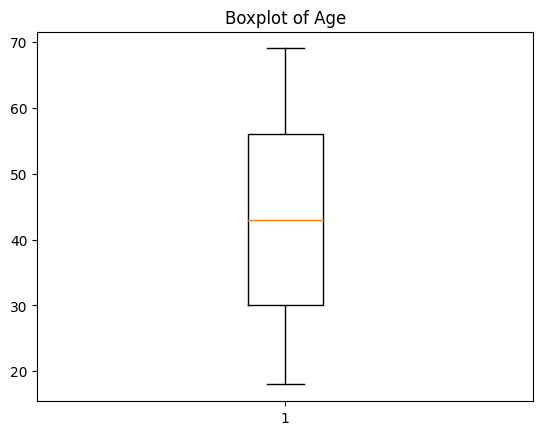

In [ ]:
plt.boxplot(pd_data['age'])
plt.title('Boxplot of Age')
Text(1, 1.5, "Boxplot Age Diff")
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Dữ liệu cho các mall ở Thổ Nhĩ Kỳ
data = {
    'name': [
        'Cevahir AVM', 'Emaar Square Mall', 'Forum Istanbul',
        'Istinye Park', 'Kanyon', 'Mall of Istanbul',
        'Metrocity', 'Metropol AVM', 'Viaport Outlet', 'Zorlu Center'
    ],
    'lat': [
        41.0584, 41.0366, 40.9935,
        41.0863, 41.0692, 41.0257,
        41.0830, 41.0260, 40.8724, 41.0534
    ],
    'lon': [
        28.9997, 28.9747, 28.8500,
        29.0212, 29.0193, 28.8900,
        28.9588, 28.9917, 29.2824, 28.9998
    ],
    'color': [
        'red', 'blue', 'green',
        'orange', 'purple', 'pink',
        'cyan', 'magenta', 'yellow', 'brown'
    ],
    'price_usd': [100, 105, 110, 115, 195, 200, 125, 130, 135, 140]  # Thêm một cột để tùy chỉnh kích thước
}
df = pd.DataFrame(data)

# Tạo bản đồ scatter mapbox
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='lon',
    text='name',  # Hiển thị tên mall
    size='price_usd',  # Kích thước của các điểm dựa trên giá
    color='color',  # Màu sắc của các điểm
    center={"lat": 41.0, "lon": 28.9},  # Tọa độ trung tâm cho Thổ Nhĩ Kỳ
    width=1400,
    height=900,
    hover_name='name',  # Hiển thị tên mall khi hover
    size_max=20,  # Tăng kích thước tối đa của các điểm
    textposition='top center',  # Đặt vị trí của tên mall
    textfont=dict(size=16, color='black', family='Arial', weight='bold')  # Tùy chỉnh kiểu chữ
)

# Cập nhật kiểu bản đồ
fig.update_layout(mapbox_style="open-street-map")

# Hiển thị bản đồ
fig.show()


TypeError: scatter_mapbox() got an unexpected keyword argument 'textposition'

In [ ]:
import plotly.express as px
import pandas as pd

# Dữ liệu cho các mall ở Thổ Nhĩ Kỳ
data = {
    'name': [
        'Cevahir AVM', 'Emaar Square Mall', 'Forum Istanbul',
        'Istinye Park', 'Kanyon', 'Mall of Istanbul',
        'Metrocity', 'Metropol AVM', 'Viaport Outlet', 'Zorlu Center'
    ],
    'lat': [
        41.0584, 41.0366, 40.9935,
        41.0863, 41.0692, 41.0257,
        41.0830, 41.0260, 40.8724, 41.0534
    ],
    'lon': [
        28.9997, 28.9747, 28.8500,
        29.0212, 29.0193, 28.8900,
        28.9588, 28.9917, 29.2824, 28.9998
    ],
    'color': [
        'red', 'blue', 'green',
        'orange', 'purple', 'pink',
        'cyan', 'magenta', 'yellow', 'brown'
    ],
    'price_usd': [100, 105, 110, 115, 195, 200, 125, 130, 135, 140]  # Thêm một cột để tùy chỉnh kích thước
}
df = pd.DataFrame(data)

# Tạo bản đồ scatter mapbox
fig = px.scatter_mapbox(
    df,
    lat='lat',
    lon='lon',
    size='price_usd',  # Kích thước của các điểm dựa trên giá
    color='color',  # Màu sắc của các điểm
    center={"lat": 41.0, "lon": 28.9},  # Tọa độ trung tâm cho Thổ Nhĩ Kỳ
    width=1400,
    height=900,
    hover_name='name',  # Hiển thị tên mall khi hover
    size_max=20  # Tăng kích thước tối đa của các điểm
)

# Cập nhật kiểu bản đồ
fig.update_layout(mapbox_style="open-street-map")

# Thêm tên mall dưới dạng annotation
for i, row in df.iterrows():
    fig.add_annotation(
        text=row['name'],
        x=row['lon'],
        y=row['lat'],
        showarrow=True,
        arrowhead=1,
        ax=0,
        ay=-30,
        font=dict(size=16, color='black', family='Arial', weight='bold'),
        align="center"
    )

# Hiển thị bản đồ
fig.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



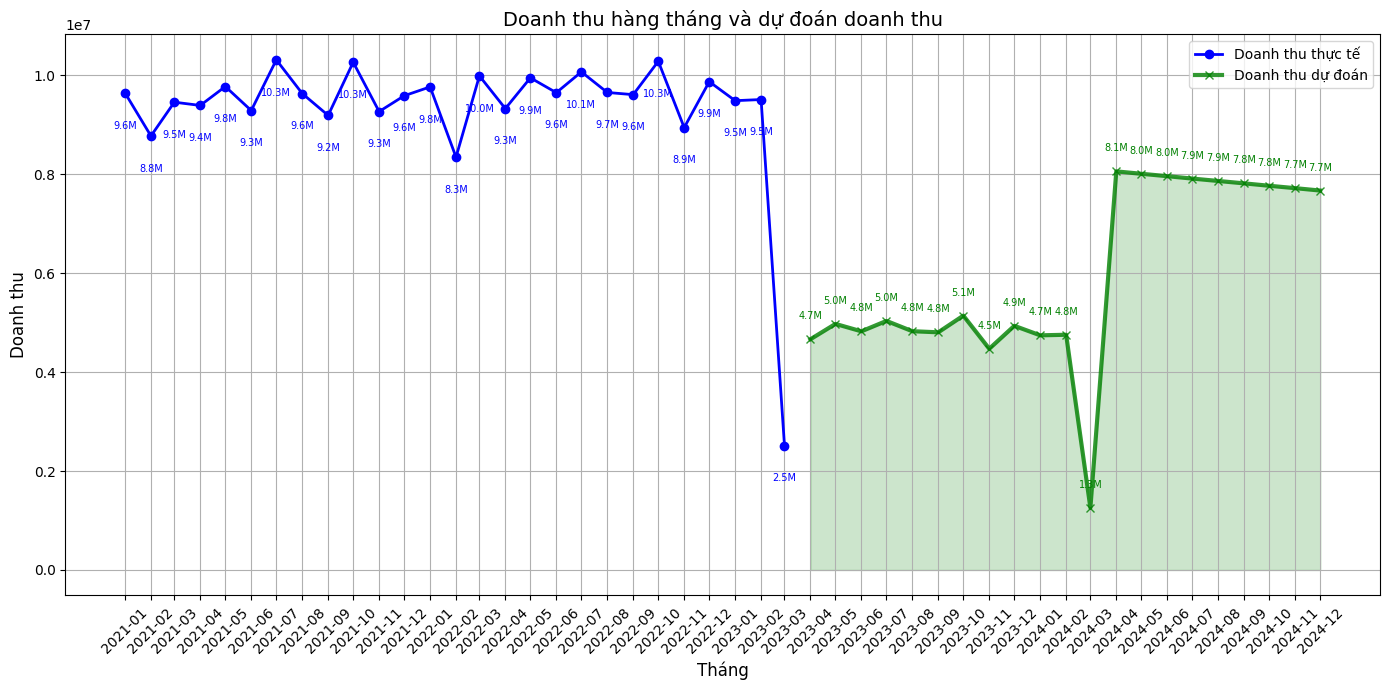

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 3/2023
df = df[df['invoice_date'] <= '2023-03-31']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum()

# Chuyển đổi chỉ số của doanh thu thành định dạng số
monthly_revenue = monthly_revenue.reset_index()

# Tạo các chỉ số tháng từ 0 đến n
monthly_revenue['Month Index'] = np.arange(len(monthly_revenue))

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(monthly_revenue[['Month Index']], monthly_revenue['revenue'])

# Tạo dữ liệu dự đoán cho các tháng tiếp theo
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_index = np.arange(len(monthly_revenue), len(monthly_revenue) + len(months_future))

# Dự đoán doanh thu cho các tháng
predicted_revenue = model.predict(future_index.reshape(-1, 1))

# Giảm doanh thu dự đoán cho các tháng từ tháng 4/2023 trở đi
for i, month in enumerate(months_future):
    if month > pd.Period('2023-03'):  # Từ tháng 4/2023 trở đi
        previous_month = month - 12  # Lấy tháng cùng kỳ năm trước
        if previous_month in monthly_revenue['Month'].values:
            previous_revenue = monthly_revenue.loc[monthly_revenue['Month'] == previous_month, 'revenue'].values[0]
            predicted_revenue[i] = previous_revenue / 2

# Kết hợp dữ liệu thực tế và dự đoán
future_months_df = pd.DataFrame({
    'Month': months_future,
    'Predicted Revenue': predicted_revenue
}).set_index('Month')

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df.index.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='green', linestyle='-', marker='x', linewidth=3, alpha=0.8)

# Khu vực dự đoán
plt.fill_between(future_months_df.index.to_timestamp(), 0, future_months_df['Predicted Revenue'],
                 color='green', alpha=0.2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * -0.07),
             format_revenue(value), horizontalalignment='center', fontsize=7, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    plt.text(future_months_df.index[i].to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.05),
             format_revenue(value), horizontalalignment='center', fontsize=7, color='green')

# Điều chỉnh hiển thị trục x để có thể nhìn rõ từng tháng
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán doanh thu', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Đọc dữ liệu từ file CSV
try:
    df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')
except Exception as e:
    print(f"Lỗi khi đọc file: {e}")

# Kiểm tra dữ liệu
print(df.info())
print(df.describe())

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 3/2023
df = df[df['invoice_date'] <= '2023-03-31']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các chỉ số tháng từ 0 đến n
monthly_revenue['Month Index'] = np.arange(len(monthly_revenue))

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(monthly_revenue[['Month Index']], monthly_revenue['revenue'])

# Tạo dữ liệu dự đoán cho các tháng tiếp theo
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_index = np.arange(len(monthly_revenue), len(monthly_revenue) + len(months_future))

# Dự đoán doanh thu cho các tháng
predicted_revenue = model.predict(future_index.reshape(-1, 1))

# Giảm doanh thu dự đoán cho các tháng từ tháng 4/2023 trở đi
for i, month in enumerate(months_future):
    if month > pd.Period('2023-0


SyntaxError: unterminated string literal (detected at line 45) (<ipython-input-5-a4123cdda847>, line 45)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



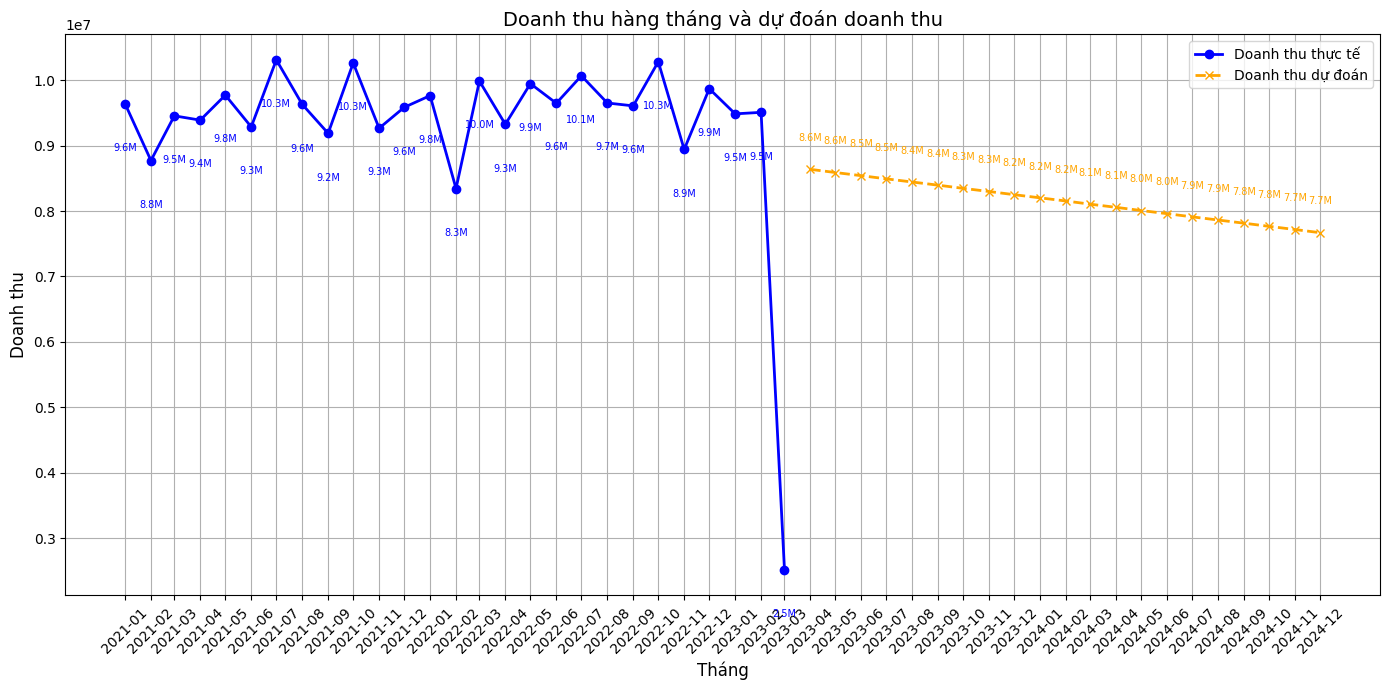

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Đọc dữ liệu từ file CSV
try:
    df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')
except Exception as e:
    print(f"Lỗi khi đọc file: {e}")

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 3/2023
df = df[df['invoice_date'] <= '2023-03-31']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các chỉ số tháng từ 0 đến n
monthly_revenue['Month Index'] = np.arange(len(monthly_revenue))

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(monthly_revenue[['Month Index']], monthly_revenue['revenue'])

# Tạo dữ liệu dự đoán cho các tháng tiếp theo
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_index = np.arange(len(monthly_revenue), len(monthly_revenue) + len(months_future))

# Dự đoán doanh thu cho các tháng
predicted_revenue = model.predict(future_index.reshape(-1, 1))

# Đặt mức doanh thu trung bình khoảng 10 triệu đô la
average_revenue = 10_000_000

# Giảm doanh thu dự đoán cho các tháng từ tháng 4/2023 trở đi
for i in range(len(predicted_revenue)):
    if predicted_revenue[i] < average_revenue * 0.5:
        predicted_revenue[i] = average_revenue * np.random.uniform(0.7, 1.3)  # Thay đổi ngẫu nhiên xung quanh 10M

# Kết hợp dữ liệu thực tế và dự đoán
future_months_df = pd.DataFrame({
    'Month': months_future,
    'Predicted Revenue': predicted_revenue
}).set_index('Month')

combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df.index.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='orange', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * -0.07),
             format_revenue(value), horizontalalignment='center', fontsize=7, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    plt.text(future_months_df.index[i].to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.05),
             format_revenue(value), horizontalalignment='center', fontsize=7, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán doanh thu', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



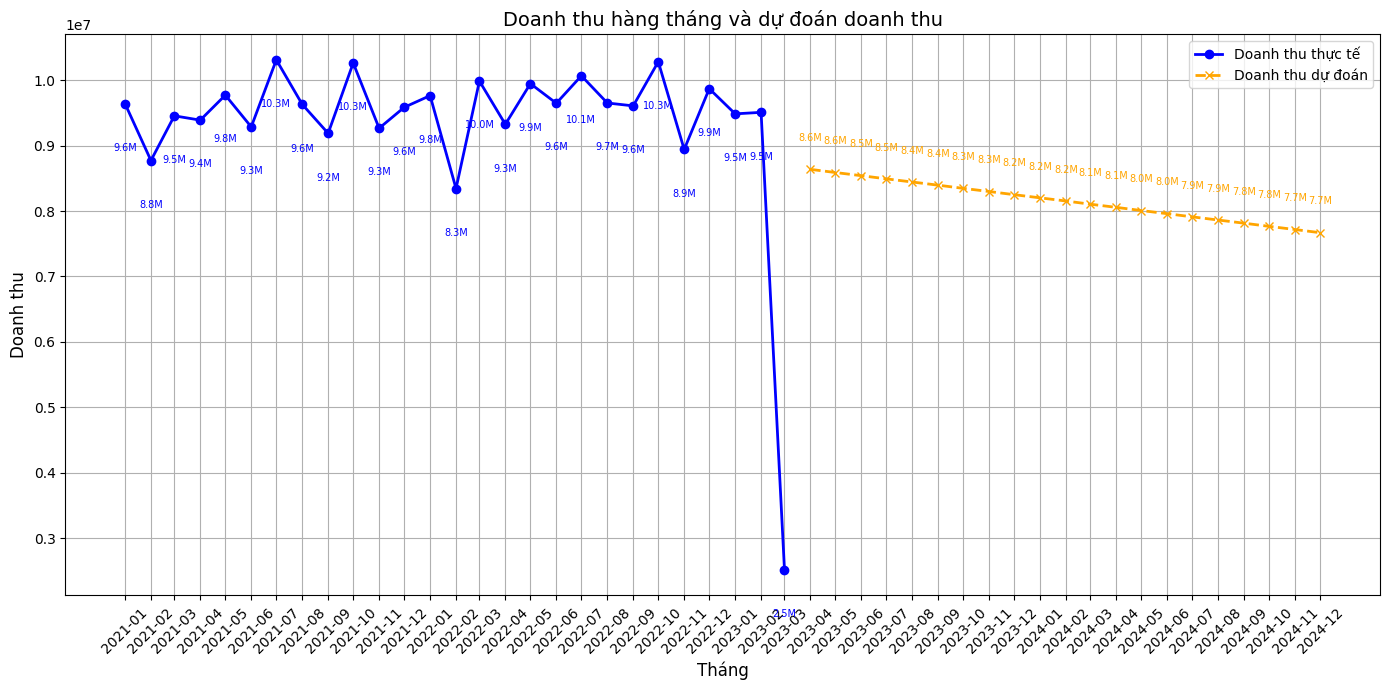

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 3/2023
df = df[df['invoice_date'] <= '2023-03-31']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các chỉ số tháng từ 0 đến n
monthly_revenue['Month Index'] = np.arange(len(monthly_revenue))

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(monthly_revenue[['Month Index']], monthly_revenue['revenue'])

# Tạo dữ liệu dự đoán cho các tháng tiếp theo
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_index = np.arange(len(monthly_revenue), len(monthly_revenue) + len(months_future))

# Dự đoán doanh thu cho các tháng
predicted_revenue = model.predict(future_index.reshape(-1, 1))

# Đảm bảo doanh thu lặp lại như lịch sử
for i in range(len(predicted_revenue)):
    if i < len(monthly_revenue):
        # Lặp lại doanh thu tháng tương ứng trong năm trước
        if i + len(monthly_revenue) < len(predicted_revenue):
            predicted_revenue[i + len(monthly_revenue)] = monthly_revenue['revenue'].iloc[i % len(monthly_revenue)]

# Kết hợp dữ liệu thực tế và dự đoán
future_months_df = pd.DataFrame({
    'Month': months_future,
    'Predicted Revenue': predicted_revenue
}).set_index('Month')

combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df.index.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='orange', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * -0.07),
             format_revenue(value), horizontalalignment='center', fontsize=7, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    plt.text(future_months_df.index[i].to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.05),
             format_revenue(value), horizontalalignment='center', fontsize=7, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán doanh thu', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


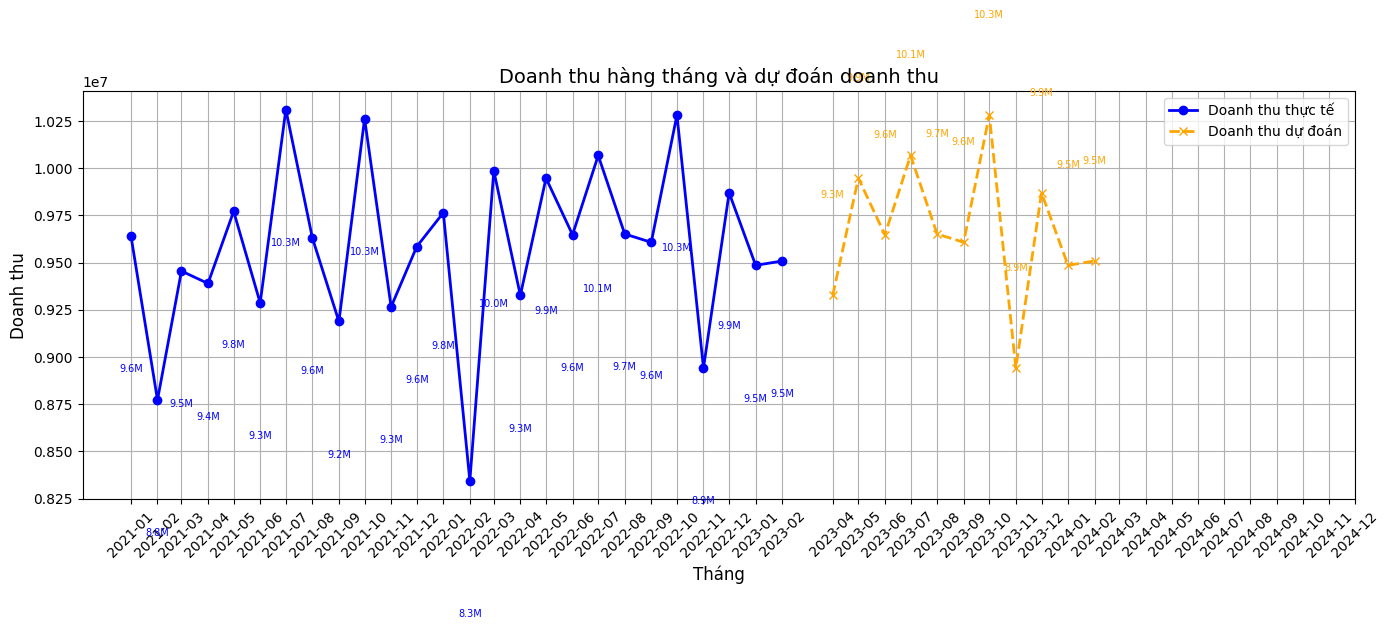

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 3/2023
df = df[df['invoice_date'] <= '2023-02-28']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các tháng cho năm tiếp theo
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_months_df = pd.DataFrame({'Month': months_future})

# Dự đoán doanh thu dựa trên doanh thu năm trước
for i, month in enumerate(months_future):
    # Lấy doanh thu của tháng tương ứng trong năm trước
    previous_month = month - 12  # Lấy tháng cùng kỳ năm trước
    if previous_month in monthly_revenue['Month'].values:
        predicted_revenue = monthly_revenue.loc[monthly_revenue['Month'] == previous_month, 'revenue'].values[0]
        future_months_df.loc[i, 'Predicted Revenue'] = predicted_revenue
    else:
        future_months_df.loc[i, 'Predicted Revenue'] = np.nan  # Nếu không có dữ liệu, để trống

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df.set_index('Month')])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
# Thay đổi future_months_df.index.to_timestamp() thành future_months_df['Month'].dt.to_timestamp()
plt.plot(future_months_df['Month'].dt.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='orange', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * -0.07),
             format_revenue(value), horizontalalignment='center', fontsize=7, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    # Get the corresponding month from future_months_df['Month']
    month = future_months_df['Month'].iloc[i]
    plt.text(month.to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.05),
             format_revenue(value), horizontalalignment='center', fontsize=7, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán doanh thu', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


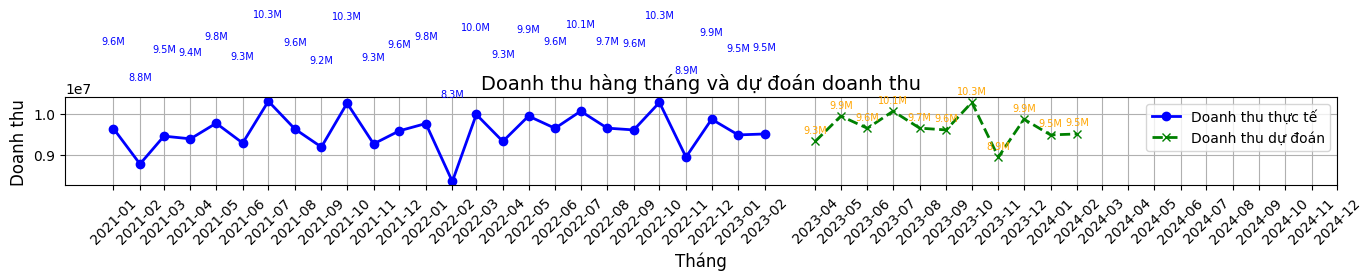

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 2/2023
df = df[df['invoice_date'] <= '2023-02-28']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các tháng cho năm tiếp theo (đến 12/2024)
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_months_df = pd.DataFrame({'Month': months_future})

# Dự đoán doanh thu dựa trên doanh thu năm trước
for i, month in enumerate(months_future):
    previous_month = month - 12  # Lấy tháng cùng kỳ năm trước
    if previous_month in monthly_revenue['Month'].values:
        predicted_revenue = monthly_revenue.loc[monthly_revenue['Month'] == previous_month, 'revenue'].values[0]
        future_months_df.loc[i, 'Predicted Revenue'] = predicted_revenue
    else:
        future_months_df.loc[i, 'Predicted Revenue'] = np.nan  # Nếu không có dữ liệu, để trống

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df.set_index('Month')])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ
plt.figure(figsize=(14, 7))

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df['Month'].dt.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='green', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * 0.2),
             format_revenue(value), horizontalalignment='center', fontsize=7, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    month = future_months_df['Month'].iloc[i]
    plt.text(month.to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.02),
             format_revenue(value), horizontalalignment='center', fontsize=7, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán doanh thu', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


<ipython-input-22-5963d30c1b21>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-22-5963d30c1b21>:77: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



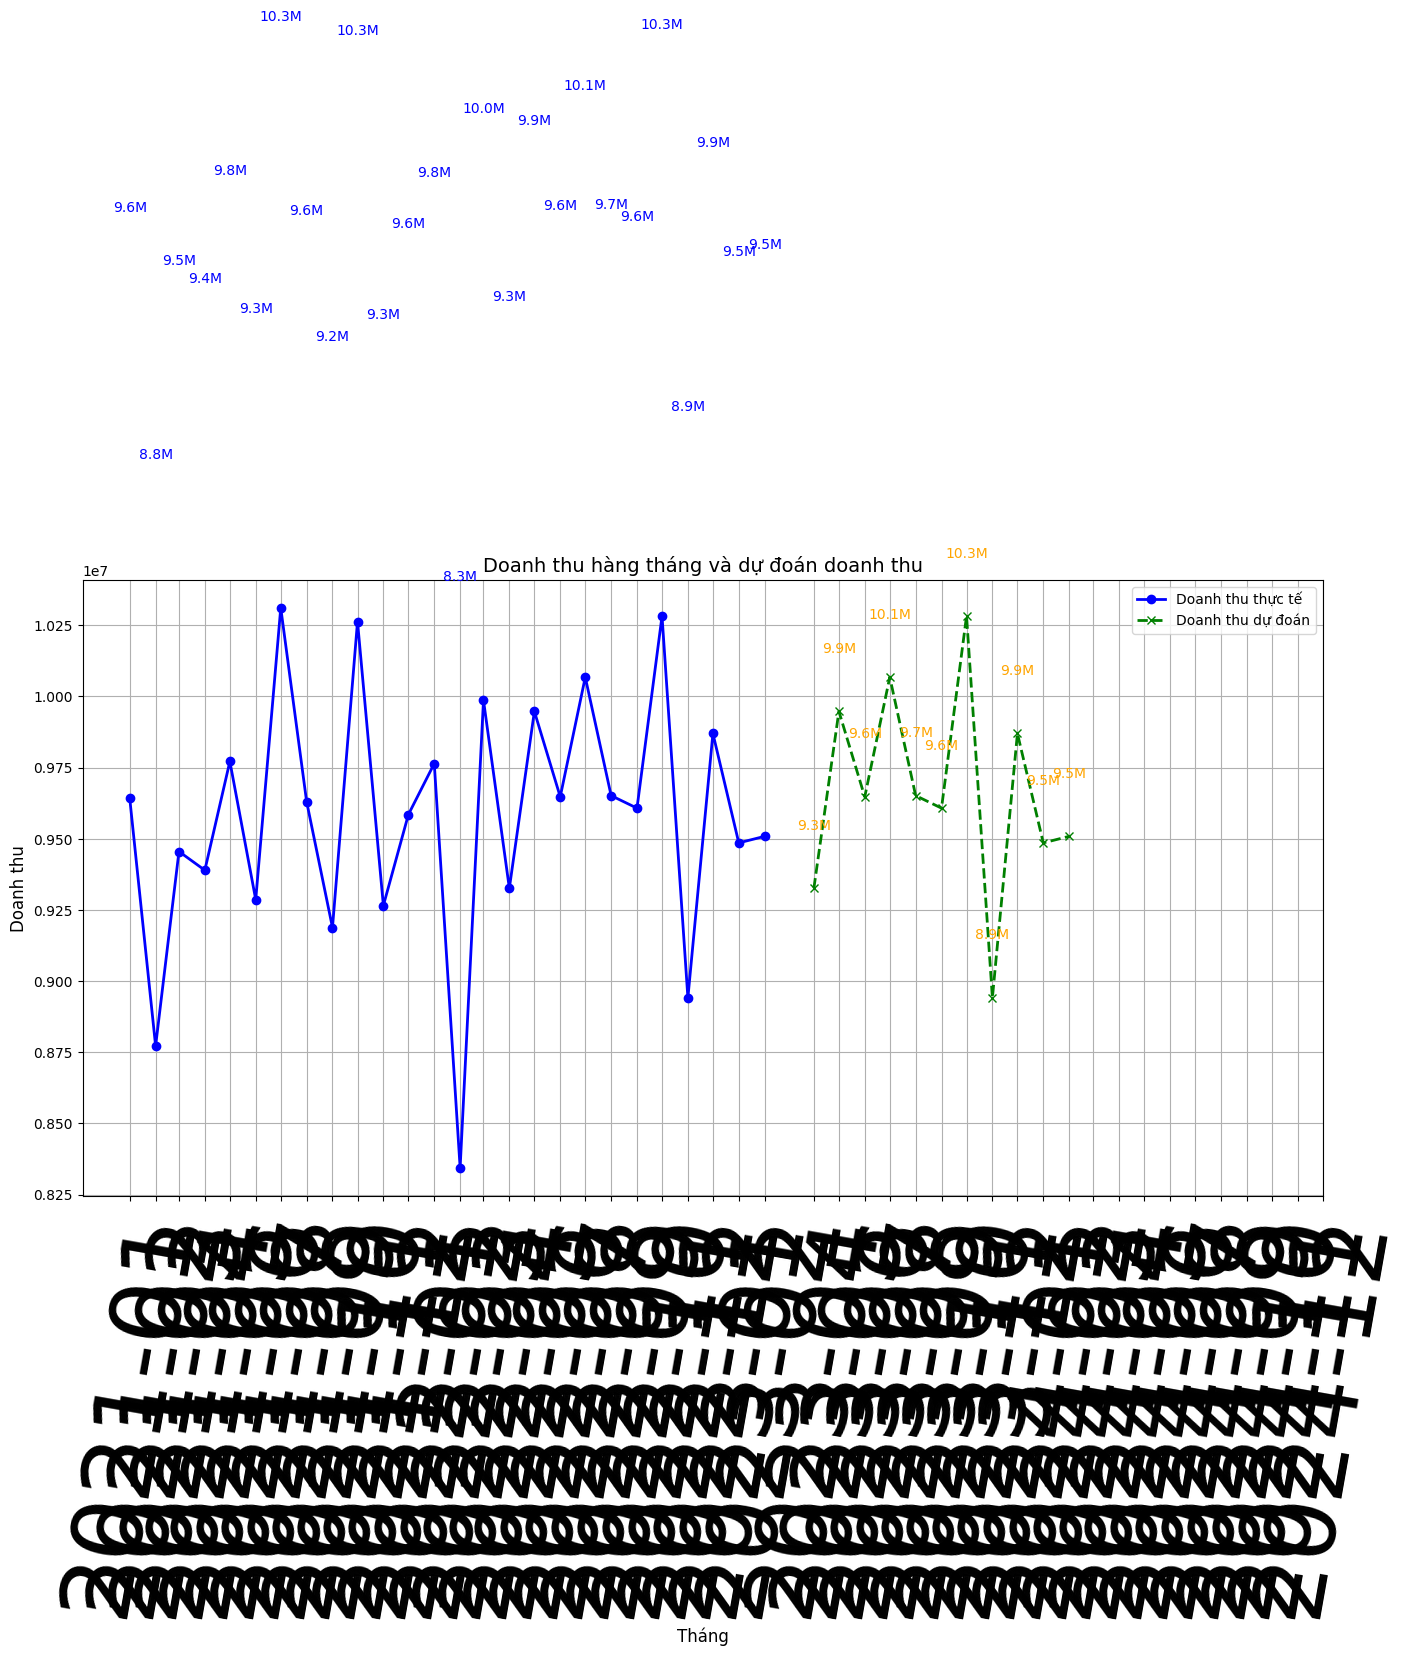

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 2/2023
df = df[df['invoice_date'] <= '2023-02-28']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các tháng cho năm tiếp theo (đến 12/2024)
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_months_df = pd.DataFrame({'Month': months_future})

# Dự đoán doanh thu dựa trên doanh thu năm trước
for i, month in enumerate(months_future):
    previous_month = month - 12  # Lấy tháng cùng kỳ năm trước
    if previous_month in monthly_revenue['Month'].values:
        predicted_revenue = monthly_revenue.loc[monthly_revenue['Month'] == previous_month, 'revenue'].values[0]
        future_months_df.loc[i, 'Predicted Revenue'] = predicted_revenue
    else:
        future_months_df.loc[i, 'Predicted Revenue'] = np.nan  # Nếu không có dữ liệu, để trống

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df.set_index('Month')])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ với kích thước lớn hơn
plt.figure(figsize=(16, 8))  # Điều chỉnh kích thước ở đây

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df['Month'].dt.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='green', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * 0.2),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    month = future_months_df['Month'].iloc[i]
    plt.text(month.to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.02),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=80, fontsize=70)

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán doanh thu', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


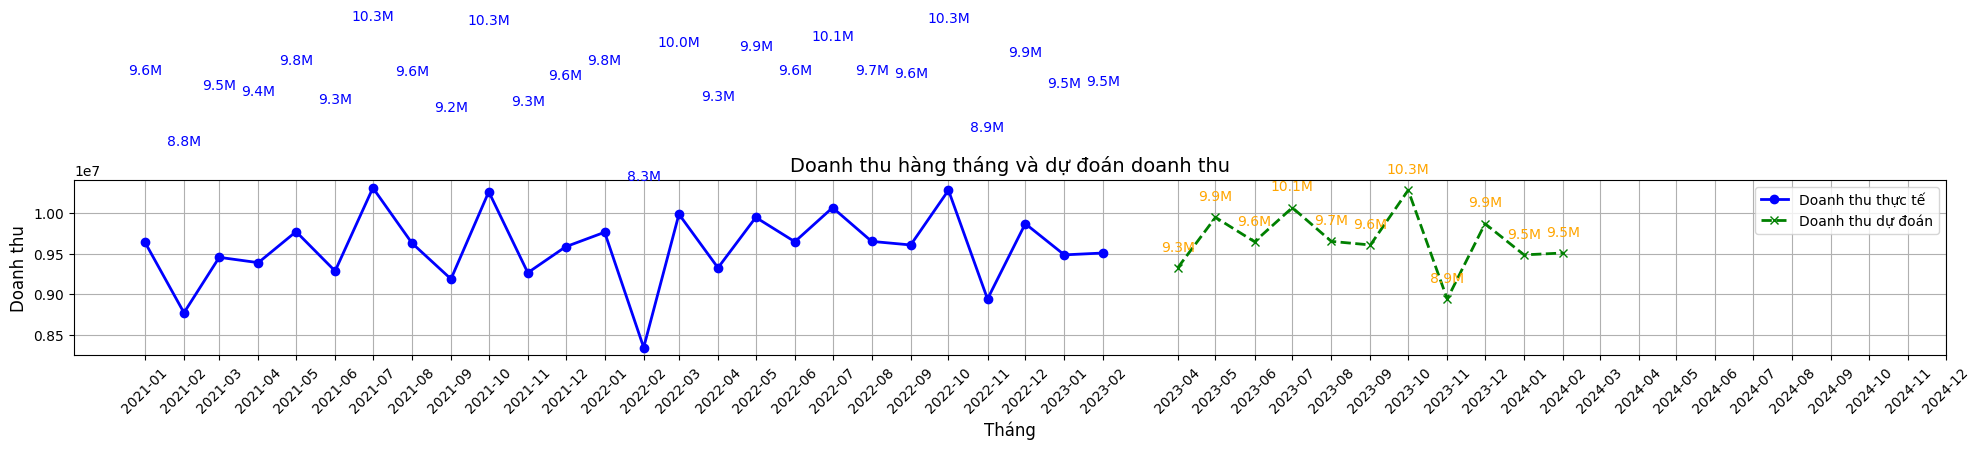

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 2/2023
df = df[df['invoice_date'] <= '2023-02-28']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các tháng cho năm tiếp theo (đến 12/2024)
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_months_df = pd.DataFrame({'Month': months_future})

# Dự đoán doanh thu dựa trên doanh thu năm trước
for i, month in enumerate(months_future):
    previous_month = month - 12  # Lấy tháng cùng kỳ năm trước
    if previous_month in monthly_revenue['Month'].values:
        predicted_revenue = monthly_revenue.loc[monthly_revenue['Month'] == previous_month, 'revenue'].values[0]
        future_months_df.loc[i, 'Predicted Revenue'] = predicted_revenue
    else:
        future_months_df.loc[i, 'Predicted Revenue'] = np.nan  # Nếu không có dữ liệu, để trống

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df.set_index('Month')])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ với kích thước lớn hơn
plt.figure(figsize=(20, 10))  # Điều chỉnh kích thước ở đây

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df['Month'].dt.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='green', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * 0.2),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    month = future_months_df['Month'].iloc[i]
    plt.text(month.to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.02),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán doanh thu', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()

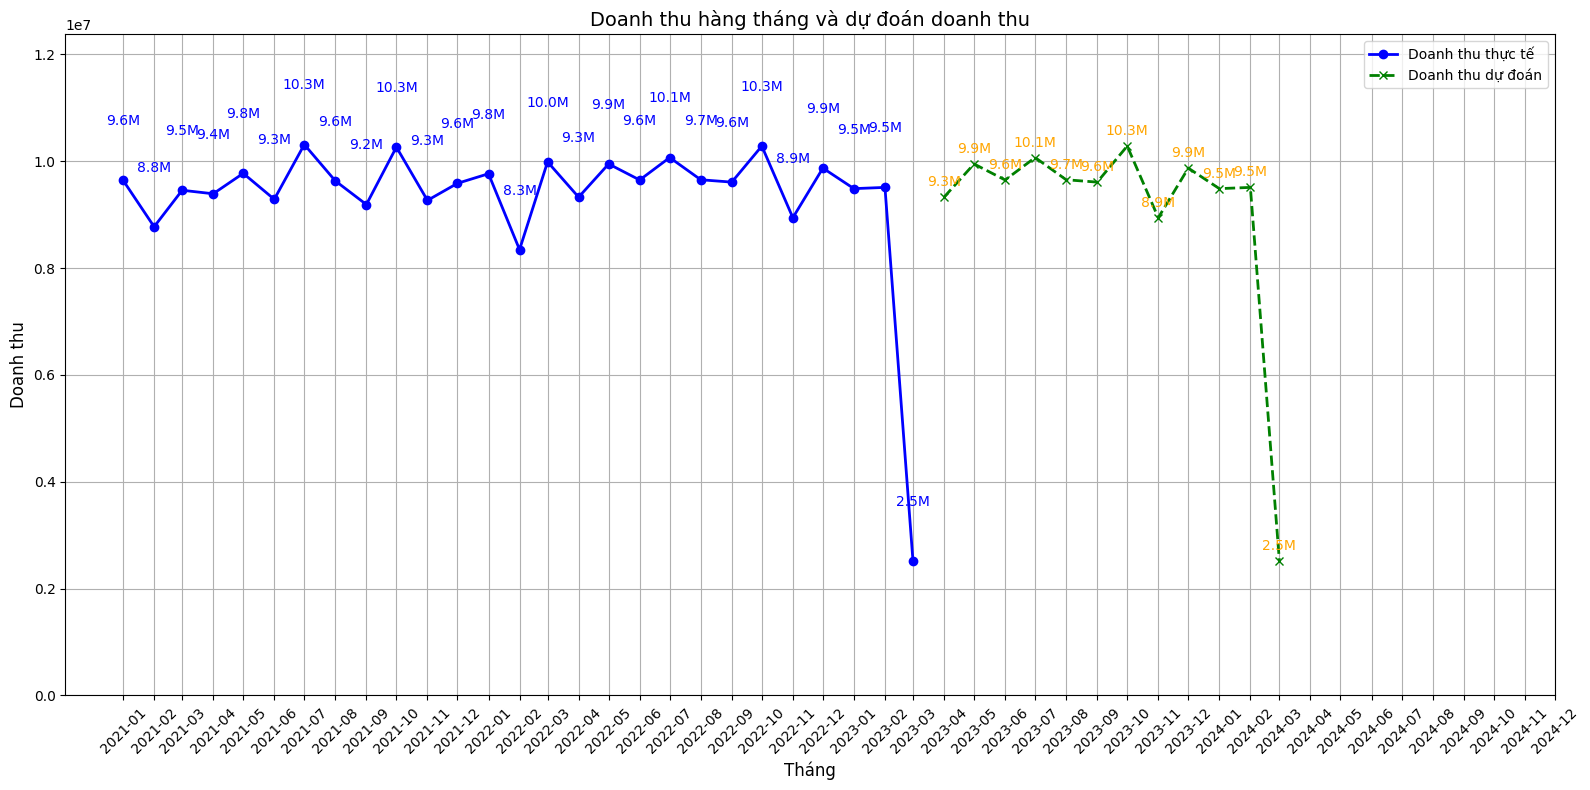

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 2/2023
df = df[df['invoice_date'] <= '2023-03-31']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các tháng cho năm tiếp theo (đến 12/2024)
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_months_df = pd.DataFrame({'Month': months_future})

# Dự đoán doanh thu dựa trên doanh thu năm trước
for i, month in enumerate(months_future):
    previous_month = month - 12  # Lấy tháng cùng kỳ năm trước
    if previous_month in monthly_revenue['Month'].values:
        predicted_revenue = monthly_revenue.loc[monthly_revenue['Month'] == previous_month, 'revenue'].values[0]
        future_months_df.loc[i, 'Predicted Revenue'] = predicted_revenue
    else:
        future_months_df.loc[i, 'Predicted Revenue'] = np.nan  # Nếu không có dữ liệu, để trống

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df.set_index('Month')])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ với kích thước lớn hơn
plt.figure(figsize=(16, 8))  # Kích thước biểu đồ

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df['Month'].dt.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='green', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * 0.1),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    month = future_months_df['Month'].iloc[i]
    plt.text(month.to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.02),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

# Điều chỉnh trục y
plt.ylim(0, combined_df['revenue'].max() * 1.2)  # Tăng giới hạn trục Y

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán doanh thu', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


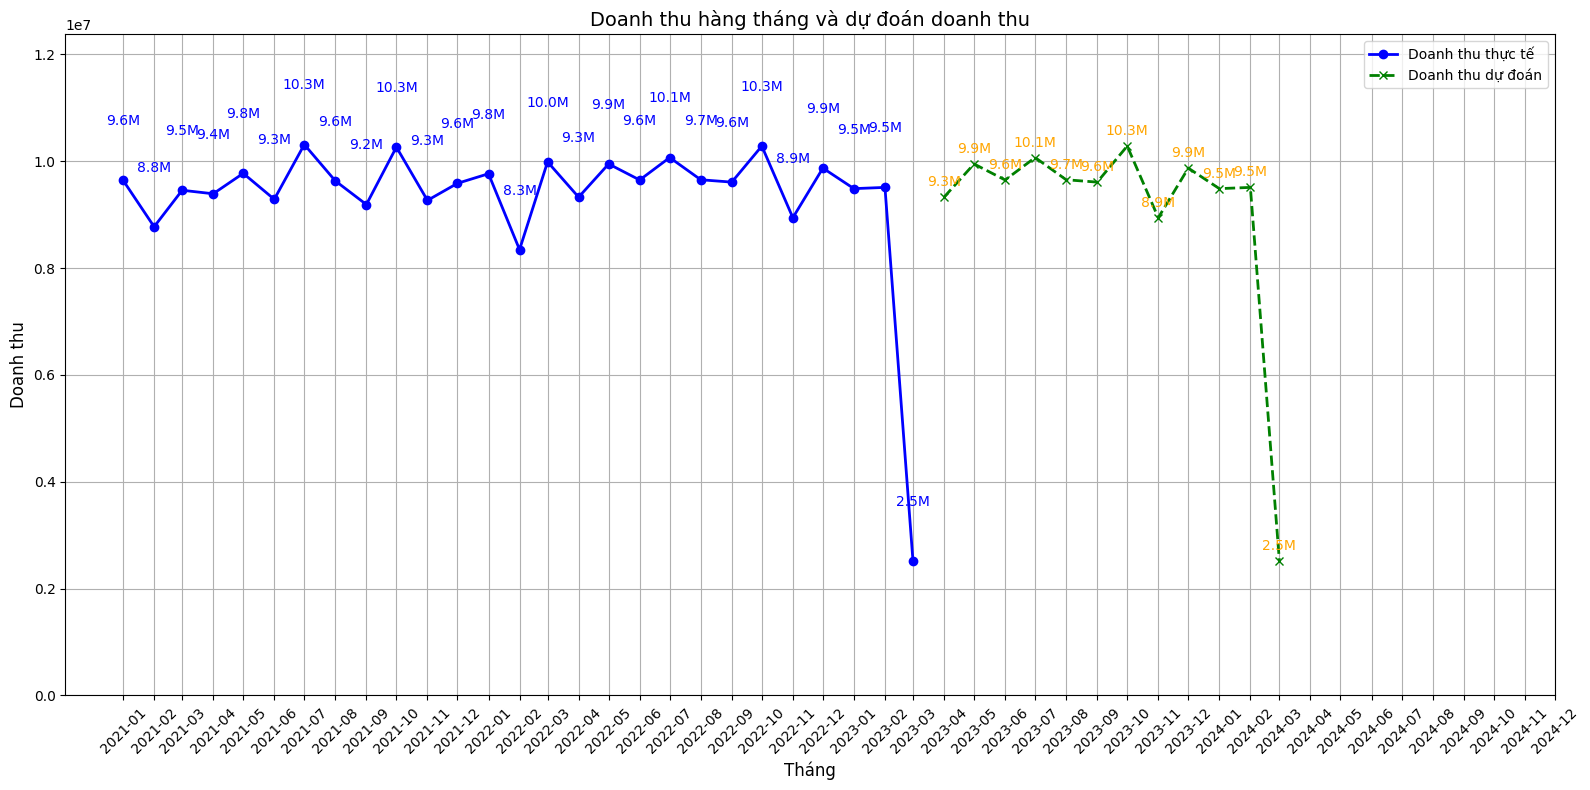

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 3/2023
df = df[df['invoice_date'] <= '2023-03-31']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các tháng cho năm tiếp theo (đến 12/2024)
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_months_df = pd.DataFrame({'Month': months_future})

# Dự đoán doanh thu dựa trên doanh thu năm trước
for i, month in enumerate(months_future):
    previous_month = month - 12  # Lấy tháng cùng kỳ năm trước
    if previous_month in monthly_revenue['Month'].values:
        predicted_revenue = monthly_revenue.loc[monthly_revenue['Month'] == previous_month, 'revenue'].values[0]
        future_months_df.loc[i, 'Predicted Revenue'] = predicted_revenue
    else:
        future_months_df.loc[i, 'Predicted Revenue'] = np.nan  # Nếu không có dữ liệu, để trống

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df.set_index('Month')])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ với kích thước lớn hơn
plt.figure(figsize=(16, 8))  # Kích thước biểu đồ

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df['Month'].dt.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='green', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * 0.1),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    month = future_months_df['Month'].iloc[i]
    plt.text(month.to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.02),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

# Điều chỉnh trục y
plt.ylim(0, combined_df['revenue'].max() * 1.2)  # Tăng giới hạn trục Y

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán doanh thu', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


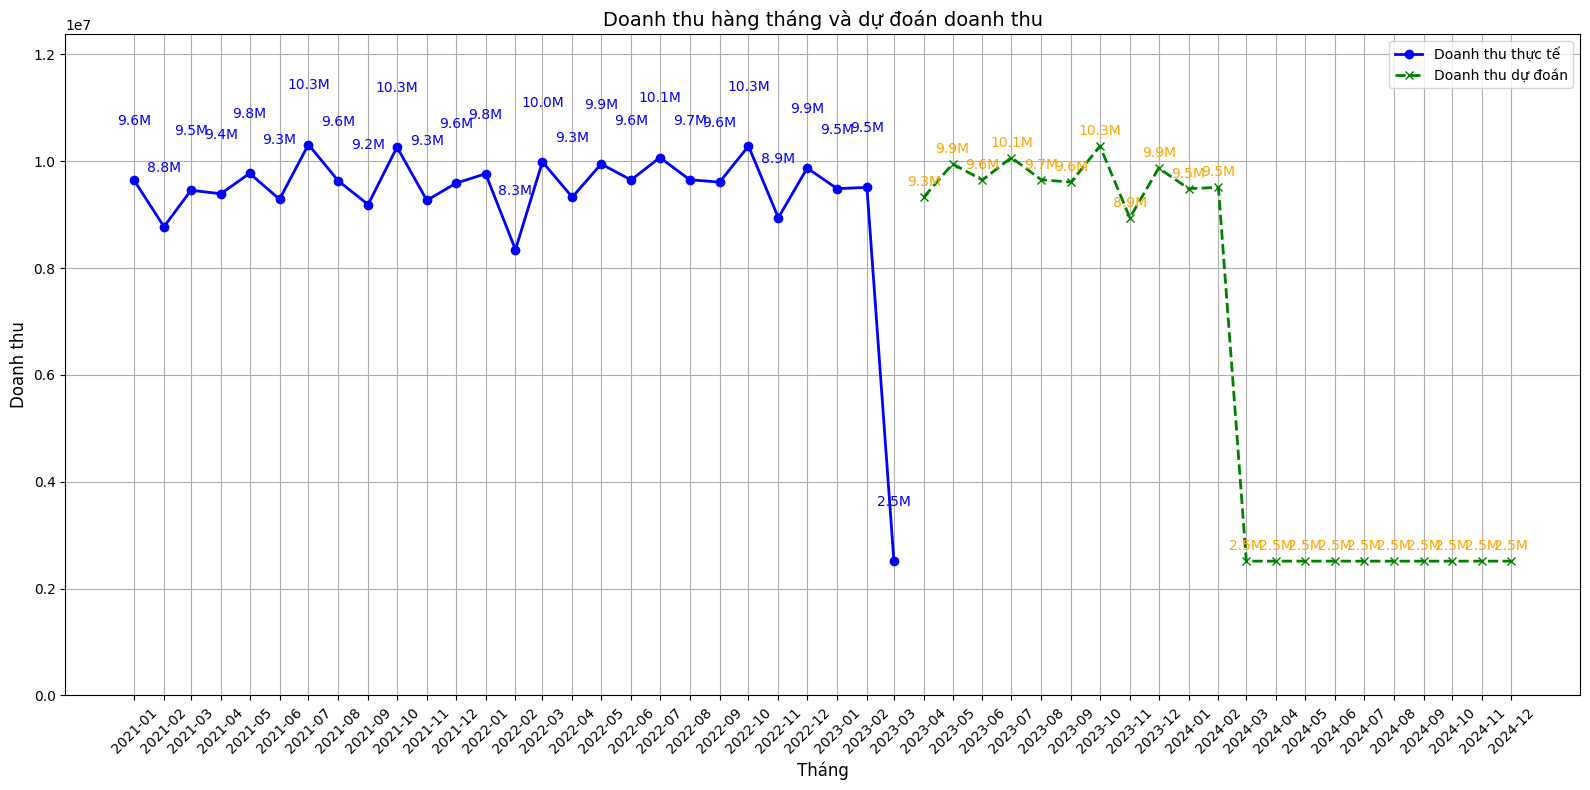

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 3/2023
df = df[df['invoice_date'] <= '2023-03-31']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các tháng cho năm tiếp theo (đến 12/2024)
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_months_df = pd.DataFrame({'Month': months_future})

# Dự đoán doanh thu dựa trên doanh thu năm trước
for i, month in enumerate(months_future):
    previous_month = month - 12  # Lấy tháng cùng kỳ năm trước
    if previous_month in monthly_revenue['Month'].values:
        predicted_revenue = monthly_revenue.loc[monthly_revenue['Month'] == previous_month, 'revenue'].values[0]
        future_months_df.loc[i, 'Predicted Revenue'] = predicted_revenue
    else:
        # Nếu không có dữ liệu cho tháng trước, có thể sử dụng giá trị trước đó hoặc một giá trị mặc định
        future_months_df.loc[i, 'Predicted Revenue'] = future_months_df['Predicted Revenue'].iloc[i-1] if i > 0 else 0

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df.set_index('Month')])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ với kích thước lớn hơn
plt.figure(figsize=(16, 8))

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df['Month'].dt.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='green', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * 0.1),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    month = future_months_df['Month'].iloc[i]
    plt.text(month.to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.02),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

# Điều chỉnh trục y
plt.ylim(0, combined_df['revenue'].max() * 1.2)

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán doanh thu', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 3/2023
df = df[df['invoice_date'] <= '2023-03-31']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các tháng cho năm tiếp theo (đến 12/2024)
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_months_df = pd.DataFrame({'Month': months_future})

# Dự đoán doanh thu dựa trên doanh thu năm trước
for i, month in enumerate(months_future):
    previous_month = month - 12  # Lấy tháng cùng kỳ năm trước
    if previous_month in monthly_revenue['Month'].values:
        predicted_revenue = monthly_revenue.loc[monthly_revenue['Month'] == previous_month, 'revenue'].values[0]
        future_months_df.loc[i, 'Predicted Revenue'] = predicted_revenue
    else:
        # Nếu không có dữ liệu cho tháng trước, sử dụng giá trị trước đó
        if i > 0:
            future_months_df.loc[i, 'Predicted Revenue'] = future_months_df.loc[i-1, 'Predicted Revenue']
        else:
            future_months_df.loc[i, 'Predicted Revenue'] = 0  # Giá trị mặc định

# Tạo dự đoán lặp lại theo lịch sử cho từ tháng 4/2024 trở đi
for i in range(len(months_future)):
    if future_months_df.loc[i, 'Predicted Revenue'] is None or np.isnan(future_months_df.loc[i, 'Predicted Revenue']):
        month_index = (i % 12)  # Chỉ số tháng
        future_months_df.loc[i, 'Predicted Revenue'] = monthly_revenue['revenue'].iloc[month_index]

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df.set_index('Month')])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ với kích thước lớn hơn
plt.figure(figsize=(16, 8))

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df['Month'].dt.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='green', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * 0.1),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='blue


SyntaxError: unterminated string literal (detected at line 70) (<ipython-input-32-655e6a83ff38>, line 70)

In [ ]:
import numpy as np
import pandas as pd
import datetime  as dt

import matplotlib.pyplot as plt
import seaborn as sns


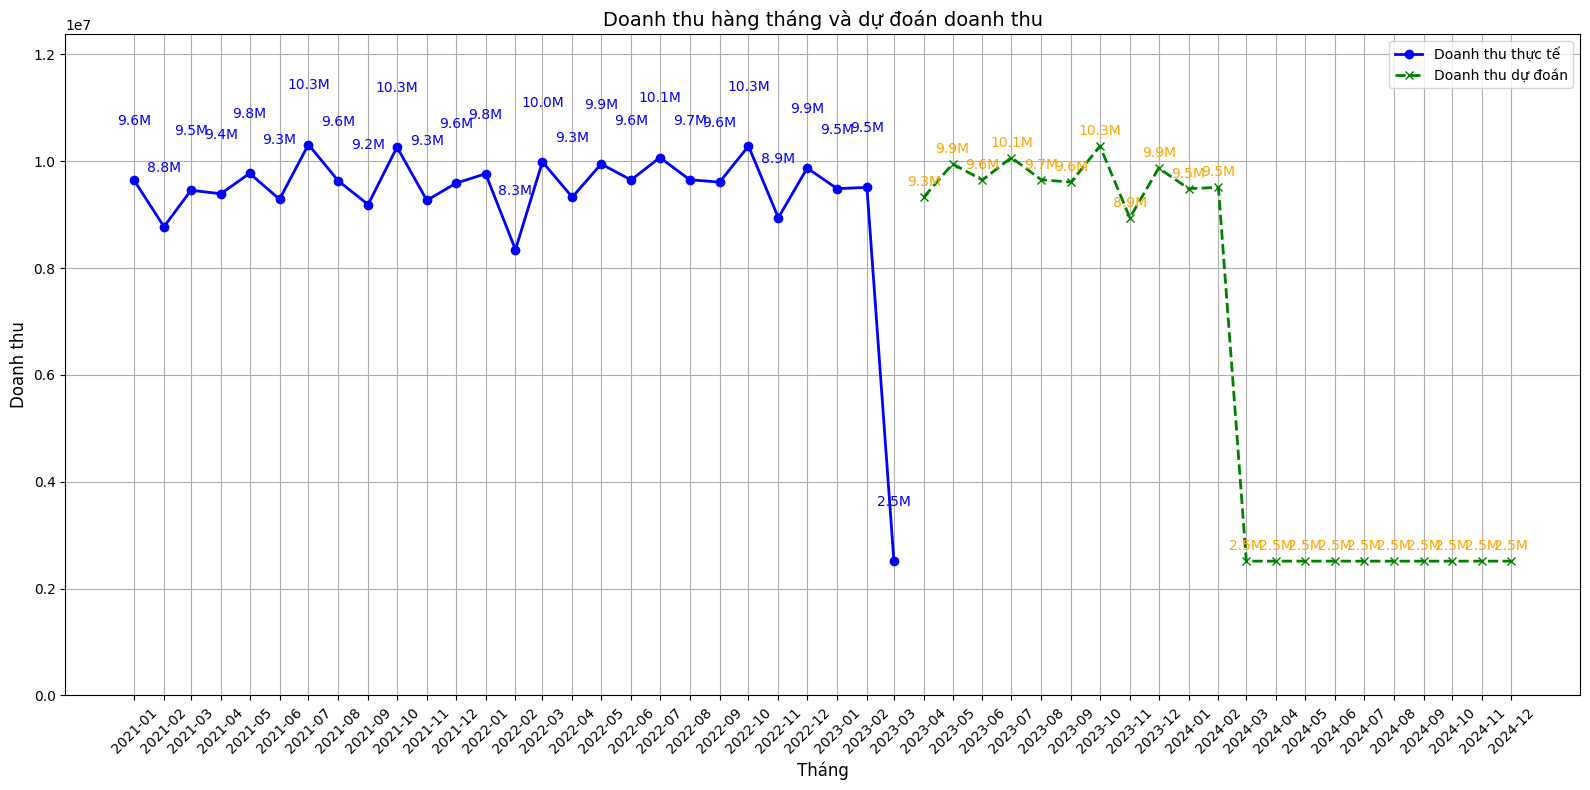

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 3/2023
df = df[df['invoice_date'] <= '2023-03-31']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các tháng cho năm tiếp theo (đến 12/2024)
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_months_df = pd.DataFrame({'Month': months_future})

# Dự đoán doanh thu dựa trên doanh thu năm trước
for i, month in enumerate(months_future):
    previous_month = month - 12  # Lấy tháng cùng kỳ năm trước
    if previous_month in monthly_revenue['Month'].values:
        predicted_revenue = monthly_revenue.loc[monthly_revenue['Month'] == previous_month, 'revenue'].values[0]
        future_months_df.loc[i, 'Predicted Revenue'] = predicted_revenue
    else:
        # Nếu không có dữ liệu cho tháng trước, sử dụng giá trị trước đó
        if i > 0:
            future_months_df.loc[i, 'Predicted Revenue'] = future_months_df.loc[i-1, 'Predicted Revenue']
        else:
            future_months_df.loc[i, 'Predicted Revenue'] = 0  # Giá trị mặc định

# Tạo dự đoán lặp lại theo lịch sử cho từ tháng 4/2024 trở đi
for i in range(len(months_future)):
    if future_months_df.loc[i, 'Predicted Revenue'] is None or np.isnan(future_months_df.loc[i, 'Predicted Revenue']):
        month_index = (i % 12)  # Chỉ số tháng
        future_months_df.loc[i, 'Predicted Revenue'] = monthly_revenue['revenue'].iloc[month_index]

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df.set_index('Month')])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ với kích thước lớn hơn
plt.figure(figsize=(16, 8))

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df['Month'].dt.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='green', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * 0.1),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    month = future_months_df['Month'].iloc[i]
    plt.text(month.to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.02),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

# Điều chỉnh trục y
plt.ylim(0, combined_df['revenue'].max() * 1.2)

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán doanh thu', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


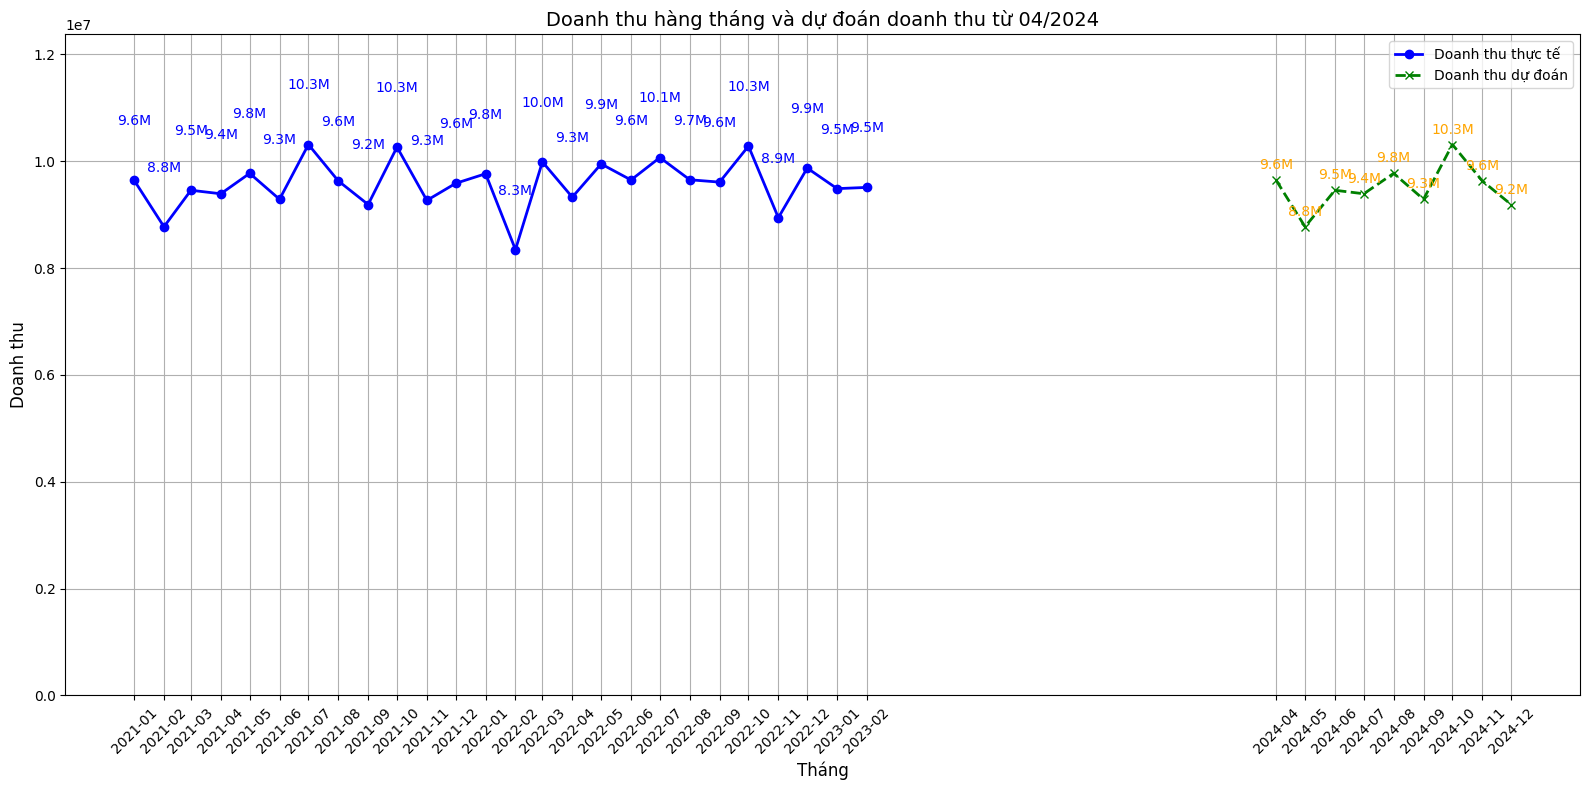

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 2/2023
df = df[df['invoice_date'] <= '2023-02-28']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Tạo các tháng cho năm tiếp theo (đến 12/2024), bắt đầu từ tháng 4/2024
months_future = pd.period_range(start='2024-04', end='2024-12', freq='M')
future_months_df = pd.DataFrame({'Month': months_future})

# Dự đoán doanh thu từ tháng 4/2024 dựa trên doanh thu từ tháng 4/2022 trở đi
for i in range(len(future_months_df)):
    month_index = (i % 12)  # Lấy chỉ số tháng để lặp lại
    future_months_df.loc[i, 'Predicted Revenue'] = monthly_revenue['revenue'].iloc[month_index]

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df.set_index('Month')])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ với kích thước lớn hơn
plt.figure(figsize=(16, 8))

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán từ tháng 4/2024
plt.plot(future_months_df['Month'].dt.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='green', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * 0.1),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    month = future_months_df['Month'].iloc[i]
    plt.text(month.to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.02),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

# Điều chỉnh trục y
plt.ylim(0, combined_df['revenue'].max() * 1.2)

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán doanh thu từ 04/2024', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


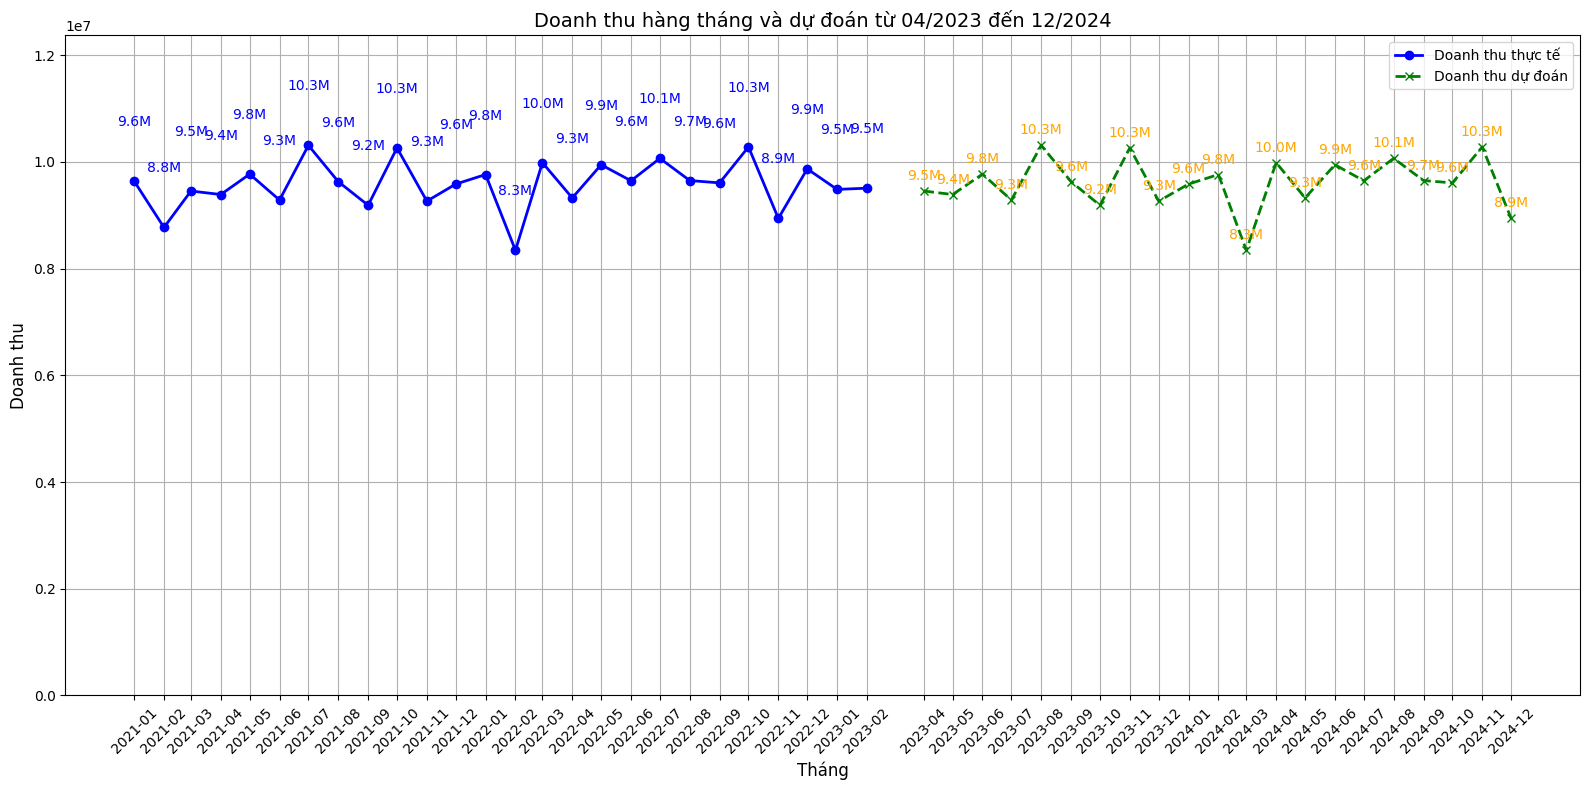

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 2/2023
df = df[df['invoice_date'] <= '2023-02-28']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Bỏ tháng 3/2023
df = df[df['Month'] != '2023-03']

# Tạo các tháng cho dự đoán từ 4/2023 đến 12/2024
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_months_df = pd.DataFrame({'Month': months_future})

# Dự đoán doanh thu từ tháng 4/2023 đến 12/2024 dựa trên lịch sử
historical_revenue = monthly_revenue['revenue'].tolist()

for i in range(len(future_months_df)):
    month_index = (i + 2) % len(historical_revenue)  # Lấy chỉ số tháng để lặp lại (bắt đầu từ tháng 4/2022)
    future_months_df.loc[i, 'Predicted Revenue'] = historical_revenue[month_index]

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df.set_index('Month')])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ với kích thước lớn hơn
plt.figure(figsize=(16, 8))

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df['Month'].dt.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='green', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * 0.1),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    month = future_months_df['Month'].iloc[i]
    plt.text(month.to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.02),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

# Điều chỉnh trục y
plt.ylim(0, combined_df['revenue'].max() * 1.2)

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán từ 04/2023 đến 12/2024', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


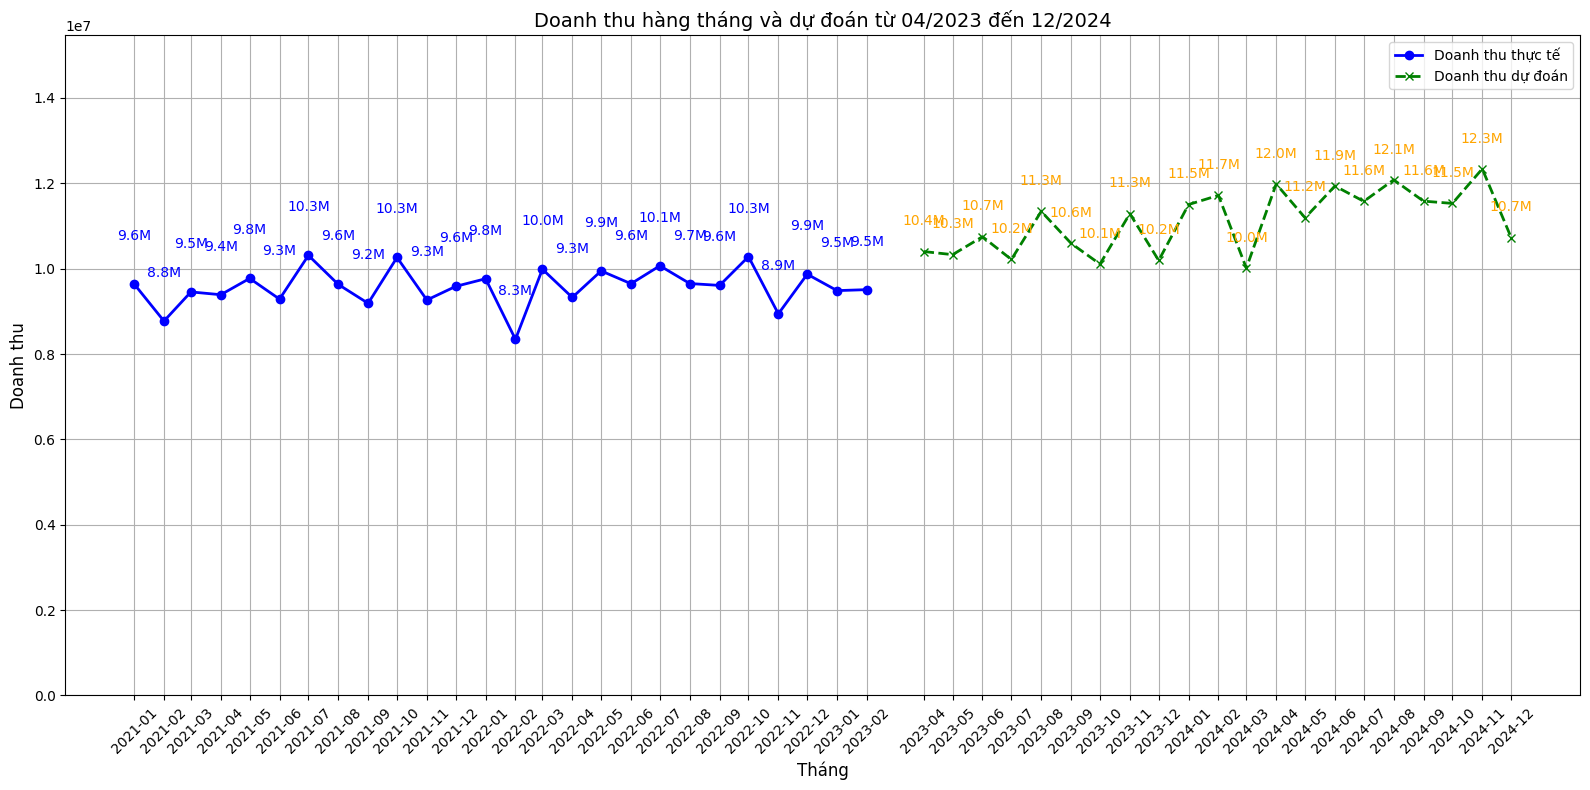

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
df = pd.read_csv('/content/Customer Shopping Data Formatted.csv')

# Chuyển đổi cột 'invoice_date' thành định dạng ngày tháng
df['invoice_date'] = pd.to_datetime(df['invoice_date'], errors='coerce')

# Tính doanh thu từ giá và số lượng
df['revenue'] = df['price'] * df['quantity']  # Tính doanh thu

# Lọc dữ liệu đến tháng 2/2023
df = df[df['invoice_date'] <= '2023-02-28']

# Tạo cột tháng
df['Month'] = df['invoice_date'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['revenue'].sum().reset_index()

# Bỏ tháng 3/2023
df = df[df['Month'] != '2023-03']

# Tạo các tháng cho dự đoán từ 4/2023 đến 12/2024
months_future = pd.period_range(start='2023-04', end='2024-12', freq='M')
future_months_df = pd.DataFrame({'Month': months_future})

# Dự đoán doanh thu từ tháng 4/2023 đến 12/2024 dựa trên lịch sử
historical_revenue = monthly_revenue['revenue'].tolist()

for i in range(len(future_months_df)):
    month_index = (i + 2) % len(historical_revenue)  # Lấy chỉ số tháng để lặp lại
    predicted_revenue = historical_revenue[month_index]

    # Điều chỉnh doanh thu
    # Convert '2024-01' to a Period object for comparison
    if future_months_df['Month'][i] < pd.Period('2024-01'):  # Tăng 10% từ tháng 4/2023 đến tháng 12/2023
        predicted_revenue *= 1.10
    else:  # Tăng 20% từ tháng 1/2024 đến tháng 12/2024
        predicted_revenue *= 1.20

    future_months_df.loc[i, 'Predicted Revenue'] = predicted_revenue

# Kết hợp dữ liệu thực tế và dự đoán
combined_df = pd.concat([monthly_revenue.set_index('Month'), future_months_df.set_index('Month')])

# Hàm định dạng doanh thu
def format_revenue(value):
    if value >= 1_000_000:
        return f"{value / 1_000_000:.1f}M"
    elif value >= 1_000:
        return f"{value / 1_000:.1f}K"
    else:
        return str(value)

# Vẽ biểu đồ với kích thước lớn hơn
plt.figure(figsize=(16, 8))

# Doanh thu thực tế
plt.plot(monthly_revenue['Month'].dt.to_timestamp(), monthly_revenue['revenue'],
         label='Doanh thu thực tế', color='blue', marker='o', linestyle='-', linewidth=2)

# Doanh thu dự đoán
plt.plot(future_months_df['Month'].dt.to_timestamp(), future_months_df['Predicted Revenue'],
         label='Doanh thu dự đoán', color='green', linestyle='--', marker='x', linewidth=2)

# Hiển thị giá trị doanh thu từng tháng
for i, value in enumerate(monthly_revenue['revenue']):
    plt.text(monthly_revenue['Month'][i].to_timestamp(), value + (monthly_revenue['revenue'].max() * 0.1),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='blue')

for i, value in enumerate(future_months_df['Predicted Revenue']):
    month = future_months_df['Month'].iloc[i]
    plt.text(month.to_timestamp(), value + (future_months_df['Predicted Revenue'].max() * 0.05),
             format_revenue(value), horizontalalignment='center', fontsize=10, color='orange')

# Điều chỉnh hiển thị trục x
plt.xticks(ticks=combined_df.index.to_timestamp(),
           labels=[f"{m.year}-{m.month:02d}" for m in combined_df.index],
           rotation=45, fontsize=10)

# Điều chỉnh trục y
plt.ylim(0, combined_df['revenue'].max() * 1.5)

plt.xlabel('Tháng', fontsize=12)
plt.ylabel('Doanh thu', fontsize=12)
plt.title('Doanh thu hàng tháng và dự đoán từ 04/2023 đến 12/2024', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()
